In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('Ter2.csv',encoding="latin-1")

/Users/stem/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df=data['year'].value_counts()

In [4]:
df.to_csv('final.csv', sep=',', encoding='utf-8')
df.head()

2014    16840
2015    14806
2013    11990
2012     8498
1992     5073
Name: year, dtype: int64

In [7]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
data = pd.read_csv('final.csv',encoding="utf-8", parse_dates=['year'], index_col='year',date_parser=dateparse)

In [8]:
data.index

DatetimeIndex(['1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01'],
              dtype='datetime64[ns]', name=u'year', freq=None)

In [9]:
ts=data['count']

In [10]:
ts.head(20)

year
1970-01-01     651
1971-01-01     470
1972-01-01     492
1973-01-01     472
1974-01-01     577
1975-01-01     739
1976-01-01     921
1977-01-01    1314
1978-01-01    1524
1979-01-01    2658
1980-01-01    2663
1981-01-01    2585
1982-01-01    2544
1983-01-01    2870
1984-01-01    3494
1985-01-01    2915
1986-01-01    2859
1987-01-01    3184
1988-01-01    3721
1989-01-01    4322
Name: count, dtype: int64

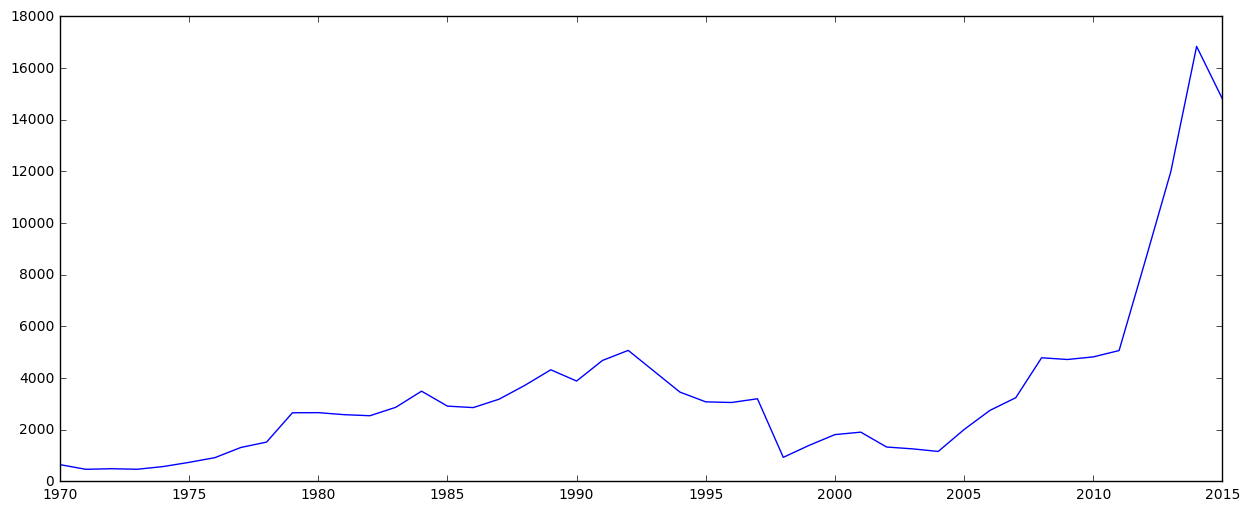

In [11]:
plt.plot(ts)

In [12]:
#Checking Stationarity of TimeSeries
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


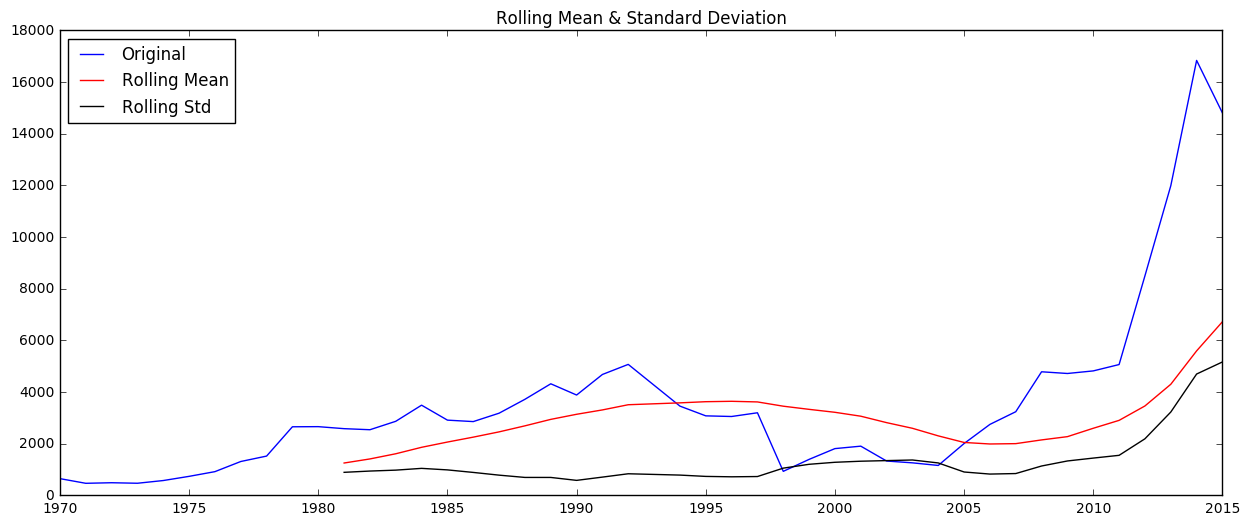

Results of Dickey-Fuller Test:
Test Statistic                  1.234002
p-value                         0.996213
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


In [13]:
test_stationarity(ts)

Though standard deviation is small, mean is clearly varying with time and this is not a stationary series. 

/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


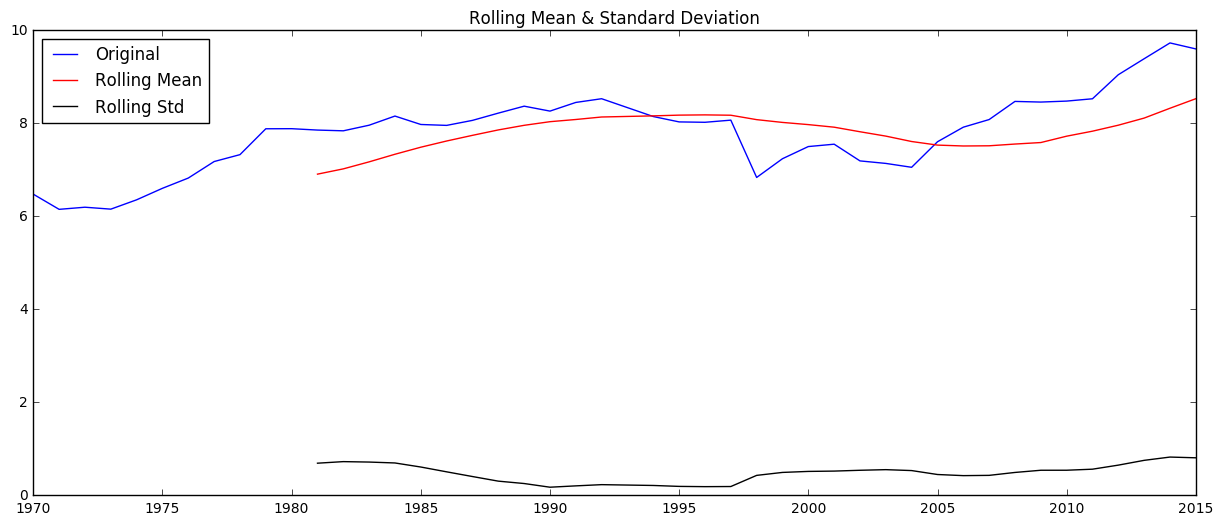

Results of Dickey-Fuller Test:
Test Statistic                 -0.699575
p-value                         0.846859
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


In [14]:
#Log Transformation
data.log= data.apply(lambda x: np.log(x))  
test_stationarity(data.log)

In [15]:
data.fd=data-data.shift(1)

/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


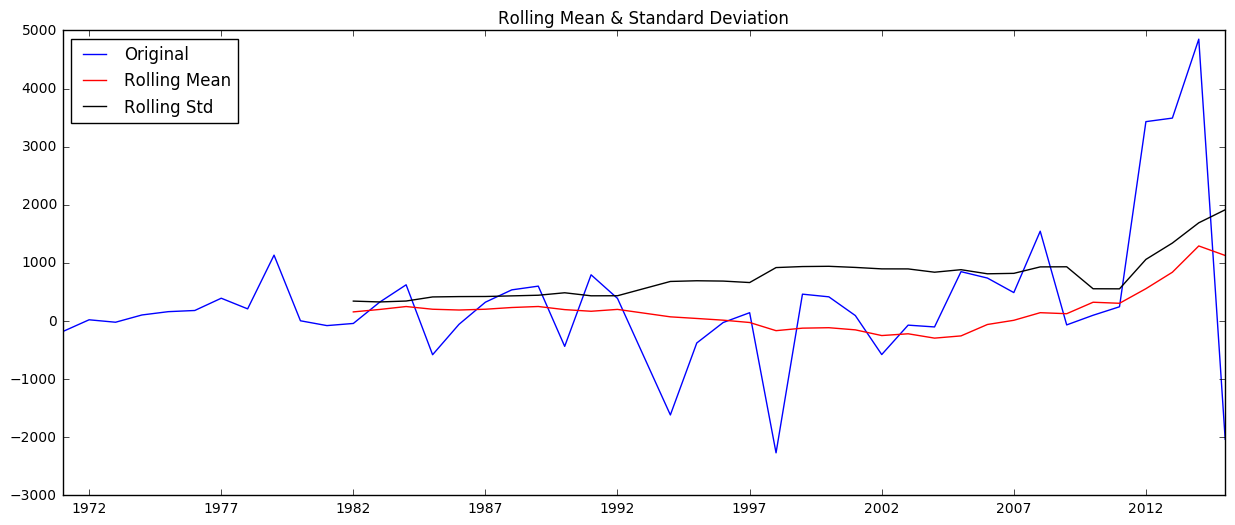

Results of Dickey-Fuller Test:
Test Statistic                 -4.655268
p-value                         0.000102
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (5%)            -2.931550
Critical Value (1%)            -3.592504
Critical Value (10%)           -2.604066
dtype: float64


In [16]:
#First_Difference
ts1=data['fd']  
test_stationarity(ts1.dropna(inplace=False))

In [17]:
data
data.sd=data-data.shift(12)

/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


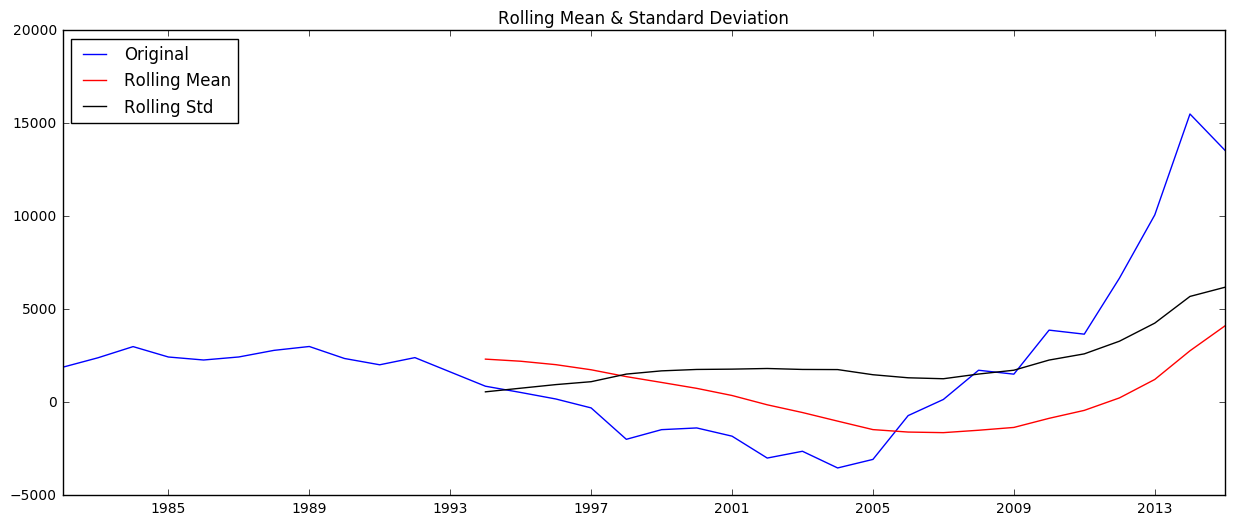

Results of Dickey-Fuller Test:
Test Statistic                 -4.086747
p-value                         0.001019
#Lags Used                      9.000000
Number of Observations Used    23.000000
Critical Value (5%)            -2.998500
Critical Value (1%)            -3.752928
Critical Value (10%)           -2.638967
dtype: float64


In [18]:
ts2=data['sd']  
test_stationarity(ts2.dropna(inplace=False))

In [19]:
data.sfd=ts1-ts1.shift(12)

/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/stem/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


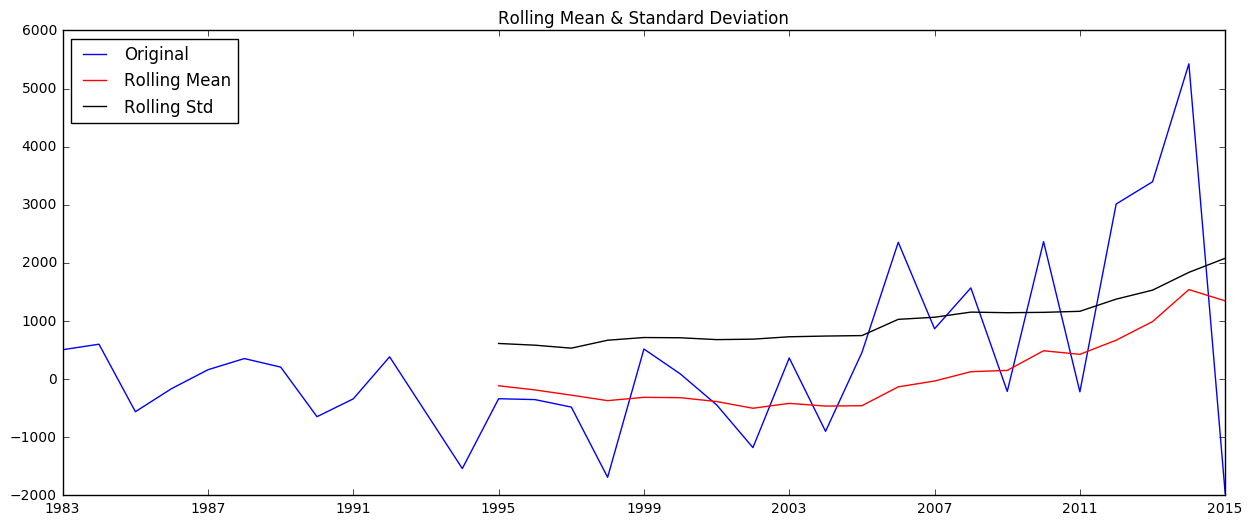

Results of Dickey-Fuller Test:
Test Statistic                 -1.478647
p-value                         0.544047
#Lags Used                      9.000000
Number of Observations Used    22.000000
Critical Value (5%)            -3.005426
Critical Value (1%)            -3.769733
Critical Value (10%)           -2.642501
dtype: float64


In [20]:
#seasonal_first_difference
ts3=data['sfd']  
test_stationarity(ts3.dropna(inplace=False))

In [21]:
data

,count,log,fd,sd,sfd
year,,,,,
1970-01-01,651,6.478510,NaN,NaN,NaN
1971-01-01,470,6.152733,-181.0,NaN,NaN
1972-01-01,492,6.198479,22.0,NaN,NaN
1973-01-01,472,6.156979,-20.0,NaN,NaN
1974-01-01,577,6.357842,105.0,NaN,NaN
1975-01-01,739,6.605298,162.0,NaN,NaN
1976-01-01,921,6.825460,182.0,NaN,NaN
1977-01-01,1314,7.180831,393.0,NaN,NaN
1978-01-01,1524,7.329094,210.0,NaN,NaN


------------------------------Selecting the Transformation----------------------------------------------

As you can see by the p-value, taking the first difference is the best option w.r.t. other transformation

 ---------------------------------Plot the ACF and PACF charts-----------------------------

In [22]:
value_fd=data.fd.dropna(inplace=False)

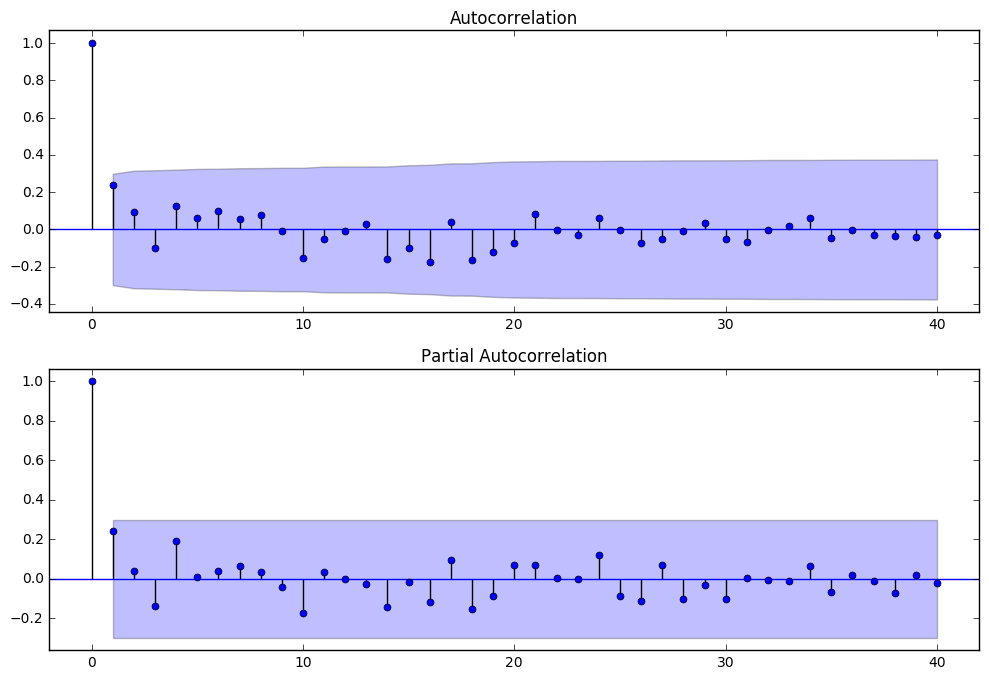

In [23]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(value_fd.iloc[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(value_fd.iloc[1:], lags=40, ax=ax2)

---------------Interpretation of Plots-------------------------------
From the ACF plot we can see that it decays after 1 hence p=1 and from pacf plots we can see that that there is no significant peak, so q=0. Hence, the parametrs for our ARIMA models p=1,q=0 and d=1<-as we found that series is stationary at first difference.
----------------------------------------------------------------------

In [25]:
#I found that there is built in function for calcuating first difference.
data['count'].diff()

year
1970-01-01       NaN
1971-01-01    -181.0
1972-01-01      22.0
1973-01-01     -20.0
1974-01-01     105.0
1975-01-01     162.0
1976-01-01     182.0
1977-01-01     393.0
1978-01-01     210.0
1979-01-01    1134.0
1980-01-01       5.0
1981-01-01     -78.0
1982-01-01     -41.0
1983-01-01     326.0
1984-01-01     624.0
1985-01-01    -579.0
1986-01-01     -56.0
1987-01-01     325.0
1988-01-01     537.0
1989-01-01     601.0
1990-01-01    -435.0
1991-01-01     796.0
1992-01-01     390.0
1994-01-01   -1615.0
1995-01-01    -377.0
1996-01-01     -25.0
1997-01-01     144.0
1998-01-01   -2267.0
1999-01-01     463.0
2000-01-01     417.0
2001-01-01      95.0
2002-01-01    -576.0
2003-01-01     -70.0
2004-01-01    -101.0
2005-01-01     850.0
2006-01-01     740.0
2007-01-01     490.0
2008-01-01    1546.0
2009-01-01     -66.0
2010-01-01     100.0
2011-01-01     246.0
2012-01-01    3431.0
2013-01-01    3492.0
2014-01-01    4850.0
2015-01-01   -2034.0
Name: count, dtype: float64

In [110]:
mod = sm.tsa.statespace.SARIMAX(data['count'], trend='n', order=(1,1,0),seasonal_order=(1,1,1,2))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                
Dep. Variable:                             count   No. Observations:                   45
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 2)   Log Likelihood                -356.291
Date:                           Mon, 24 Apr 2017   AIC                            720.583
Time:                                   12:39:42   BIC                            727.809
Sample:                               01-01-1970   HQIC                           723.277
                                    - 01-01-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2009      0.164      1.223      0.222      -0.121       0.523
ar.S.L2       -0.5036      0.312     -1.614

In [114]:
data['forecast'] = results.predict(start = 25, end= 32, dynamic= True)  

In [115]:
data

,count,log,fd,sd,sfd,forecast
year,,,,,,
1970-01-01,651,6.478510,NaN,NaN,NaN,NaN
1971-01-01,470,6.152733,-181.0,NaN,NaN,NaN
1972-01-01,492,6.198479,22.0,NaN,NaN,NaN
1973-01-01,472,6.156979,-20.0,NaN,NaN,NaN
1974-01-01,577,6.357842,105.0,NaN,NaN,NaN
1975-01-01,739,6.605298,162.0,NaN,NaN,NaN
1976-01-01,921,6.825460,182.0,NaN,NaN,NaN
1977-01-01,1314,7.180831,393.0,NaN,NaN,NaN
1978-01-01,1524,7.329094,210.0,NaN,NaN,NaN


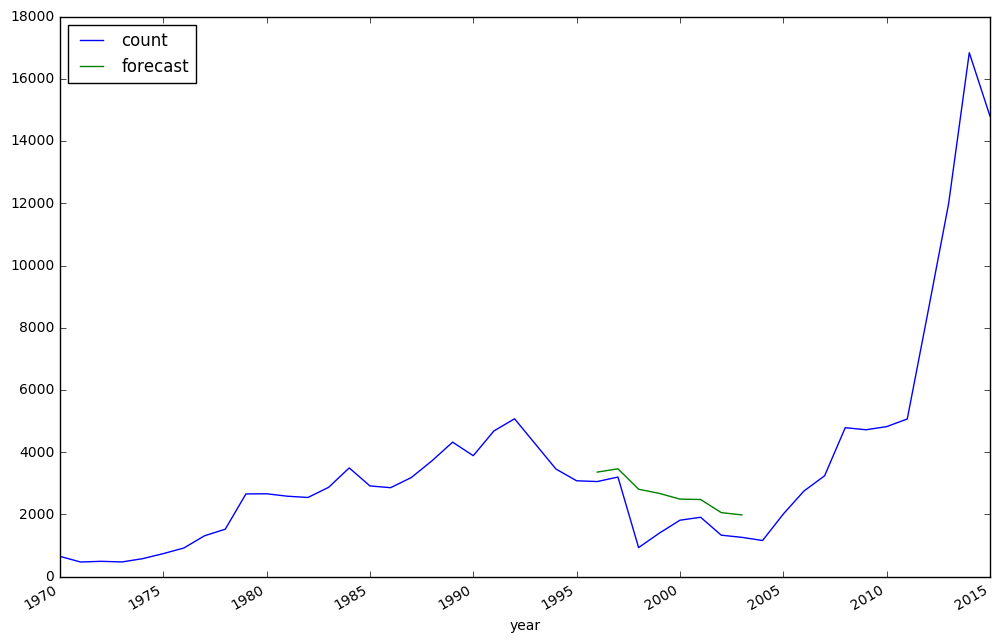

In [116]:
data[['count', 'forecast']].plot(figsize=(12, 8))

@Author:- Rajat Handa